In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import nltk
import re
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install stopwords

In [ ]:
!pip install nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install keras


In [ ]:
pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.15.0 which is incompatible.


In [ ]:
data = pd.read_csv('/content/drug.com 2.csv')
data


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,5/20/2012,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,4/27/2010,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,12/14/2009,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,11/3/2015,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,11/27/2016,37
...,...,...,...,...,...,...,...
4212,84100,Ethinyl estradiol / norgestimate,Birth Control,"""This will be the 6th month I&#039;ve been on ...",5,4/9/2017,6
4213,146853,Alprazolam,Anxiety,"""I suffer from complicated grief and PTSD, I l...",8,1/8/2017,30
4214,124779,Omega-3 polyunsaturated fatty acids,Hypertriglyceridemia,"""I&#039;ve used Lovaza for about 8 months and ...",10,6/22/2008,140
4215,13778,Amphetamine / dextroamphetamine,ADHD,"""I used to take a high dosage time release tab...",9,10/29/2008,19


<Axes: title={'center': 'percentage rating of drugs'}, ylabel='Counts'>

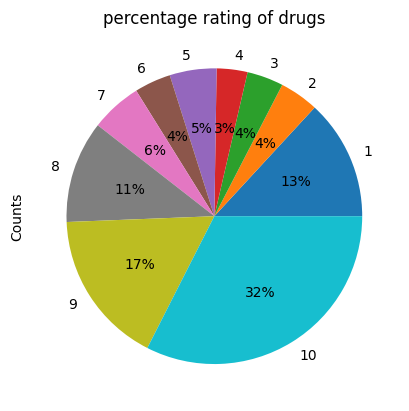

In [ ]:
data.groupby(['rating']).size().plot(kind='pie',ylabel='Counts', autopct='%1.0f%%', title='percentage rating of drugs')

In [ ]:
#lowercasing first 10 texts
data['commentsReview'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['commentsReview'] = data['review'].str.replace('[^\w\s]',"")
data.review

<ipython-input-10-4c1f70f99d9e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['commentsReview'] = data['review'].str.replace('[^\w\s]',"")


0       "It has no side effect, I take it in combinati...
1       "My son is halfway through his fourth week of ...
2       "I used to take another oral contraceptive, wh...
3       "This is my first time using any form of birth...
4       "Suboxone has completely turned my life around...
                              ...                        
4212    "This will be the 6th month I&#039;ve been on ...
4213    "I suffer from complicated grief and PTSD, I l...
4214    "I&#039;ve used Lovaza for about 8 months and ...
4215    "I used to take a high dosage time release tab...
4216    "I started phentermine in 2015 weighing in at ...
Name: review, Length: 4217, dtype: object

In [ ]:
#removing stopwords
stop = stopwords.words('english')
data['commentsReview'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.review

0       "It has no side effect, I take it in combinati...
1       "My son is halfway through his fourth week of ...
2       "I used to take another oral contraceptive, wh...
3       "This is my first time using any form of birth...
4       "Suboxone has completely turned my life around...
                              ...                        
4212    "This will be the 6th month I&#039;ve been on ...
4213    "I suffer from complicated grief and PTSD, I l...
4214    "I&#039;ve used Lovaza for about 8 months and ...
4215    "I used to take a high dosage time release tab...
4216    "I started phentermine in 2015 weighing in at ...
Name: review, Length: 4217, dtype: object

In [ ]:
#lemmatizing
data['commentsReview'] = data['review'].apply(lambda x: " ".join([Word(word).lemmatize()
for word in x.split()]))
data.review

0       "It has no side effect, I take it in combinati...
1       "My son is halfway through his fourth week of ...
2       "I used to take another oral contraceptive, wh...
3       "This is my first time using any form of birth...
4       "Suboxone has completely turned my life around...
                              ...                        
4212    "This will be the 6th month I&#039;ve been on ...
4213    "I suffer from complicated grief and PTSD, I l...
4214    "I&#039;ve used Lovaza for about 8 months and ...
4215    "I used to take a high dosage time release tab...
4216    "I started phentermine in 2015 weighing in at ...
Name: review, Length: 4217, dtype: object

In [ ]:
# Keeping only the neccessary columns
data = data[['review','rating']]
data

,review,rating
0,"""It has no side effect, I take it in combinati...",9
1,"""My son is halfway through his fourth week of ...",8
2,"""I used to take another oral contraceptive, wh...",5
3,"""This is my first time using any form of birth...",8
4,"""Suboxone has completely turned my life around...",9
...,...,...
4212,"""This will be the 6th month I&#039;ve been on ...",5
4213,"""I suffer from complicated grief and PTSD, I l...",8
4214,"""I&#039;ve used Lovaza for about 8 months and ...",10
4215,"""I used to take a high dosage time release tab...",9


In [ ]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['review'].values)
X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X)

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 395, 128)          256000    
                                                                 
 spatial_dropout1d (Spatial  (None, 395, 128)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 10)                1970      
                                                                 
Total params: 512770 (1.96 MB)
Trainable params: 512770 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(data['rating']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2951, 395) (2951, 10)
(1266, 395) (1266, 10)


In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
93/93 - 221s - loss: 2.0351 - accuracy: 0.3196 - 221s/epoch - 2s/step
Epoch 2/10
93/93 - 214s - loss: 1.8897 - accuracy: 0.3480 - 214s/epoch - 2s/step
Epoch 3/10
93/93 - 221s - loss: 1.6991 - accuracy: 0.4049 - 221s/epoch - 2s/step
Epoch 4/10
93/93 - 216s - loss: 1.5521 - accuracy: 0.4632 - 216s/epoch - 2s/step
Epoch 5/10
93/93 - 215s - loss: 1.4331 - accuracy: 0.5039 - 215s/epoch - 2s/step
Epoch 6/10
93/93 - 217s - loss: 1.3288 - accuracy: 0.5405 - 217s/epoch - 2s/step
Epoch 7/10
93/93 - 214s - loss: 1.1945 - accuracy: 0.5937 - 214s/epoch - 2s/step
Epoch 8/10
93/93 - 213s - loss: 1.0756 - accuracy: 0.6333 - 213s/epoch - 2s/step
Epoch 9/10
93/93 - 213s - loss: 0.9990 - accuracy: 0.6716 - 213s/epoch - 2s/step
Epoch 10/10
93/93 - 212s - loss: 0.9001 - accuracy: 0.7028 - 212s/epoch - 2s/step
